In [1]:
import pandas as pd

# song count we want to use for a run. Good Sample size: 1000 - 10000, full size: 114000
song_count = 1000
cluster_count = int(song_count/10)

data = pd.read_csv("./data/dataset.csv", usecols=['energy', 'valence', 'tempo', 'danceability', 'speechiness', 'track_id', 'track_name', 'artists', 'track_genre'])
subset_with_id_and_name = data.sample(song_count)
subset = subset_with_id_and_name[['energy','valence','tempo','danceability','speechiness']]

In [2]:
print(len(subset))
display(subset.head(10))

1000


,energy,valence,tempo,danceability,speechiness
563,0.423,0.1530,88.865,0.441,0.0282
32627,0.663,0.8290,122.012,0.803,0.0338
36790,0.658,0.5870,94.907,0.893,0.2800
6542,0.981,0.2430,141.338,0.454,0.1690
9922,0.508,0.0824,159.992,0.729,0.0931
32401,0.623,0.7350,167.061,0.529,0.0367
69679,0.610,0.5550,94.936,0.565,0.0429
33667,0.763,0.7770,170.057,0.753,0.2750
43217,0.953,0.2910,177.940,0.408,0.2260
84731,0.635,0.4230,87.810,0.463,0.0475


## Plot Subset
### The Plots are not accurate anymore as we increased the number of columns from 3 to 5 but didn't update the plots afterwards

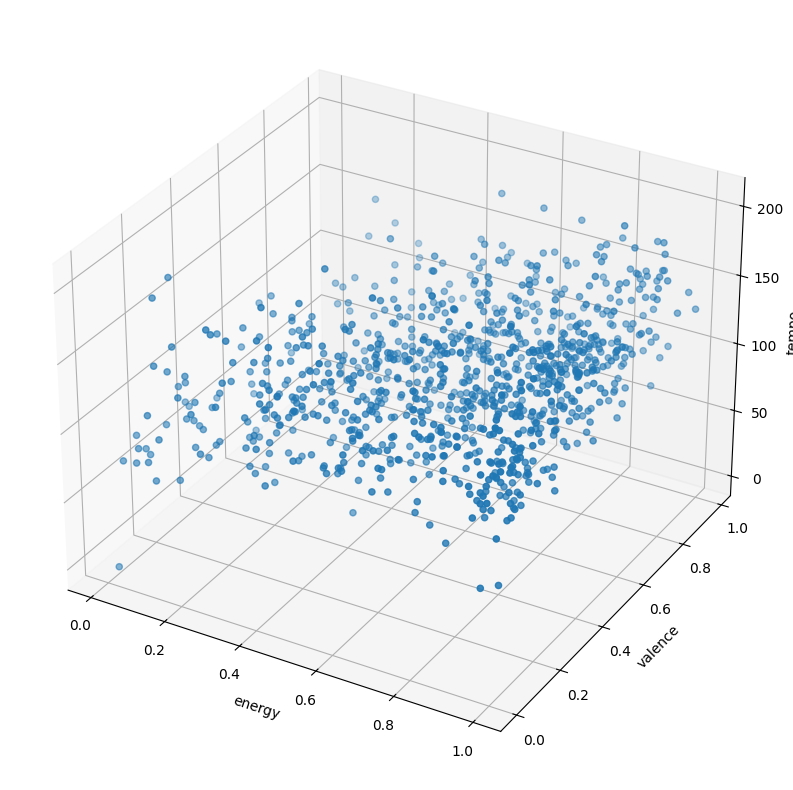

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection="3d")

ax.scatter(subset['energy'], subset['valence'], subset['tempo'])


ax.set_xlabel('energy')
ax.set_ylabel('valence')
ax.set_zlabel('tempo')

plt.show()

## Normalizing the data (Min Max Norming)

In [4]:
from sklearn import preprocessing

norm_subset = subset

norm_subset = (norm_subset - norm_subset.min()) / (norm_subset.max() - norm_subset.min())
print(norm_subset.head(10))
X_train_norm = norm_subset


         energy   valence     tempo  danceability  speechiness
563    0.418917  0.156602  0.432374      0.459854     0.029715
32627  0.661878  0.848516  0.593651      0.837331     0.035616
36790  0.656817  0.600819  0.461772      0.931178     0.295047
6542   0.983803  0.248721  0.687682      0.473410     0.178082
9922   0.504966  0.084340  0.778444      0.760167     0.098103
32401  0.621385  0.752303  0.812838      0.551616     0.038672
69679  0.608224  0.568066  0.461913      0.589155     0.045205
33667  0.763112  0.795292  0.827415      0.785193     0.289779
43217  0.955457  0.297851  0.865770      0.425443     0.238145
84731  0.633533  0.432958  0.427241      0.482795     0.050053


## Plot normalized Data
### The Plots are not accurate anymore as we increased the number of columns from 3 to 5 but didn't update the plots afterwards

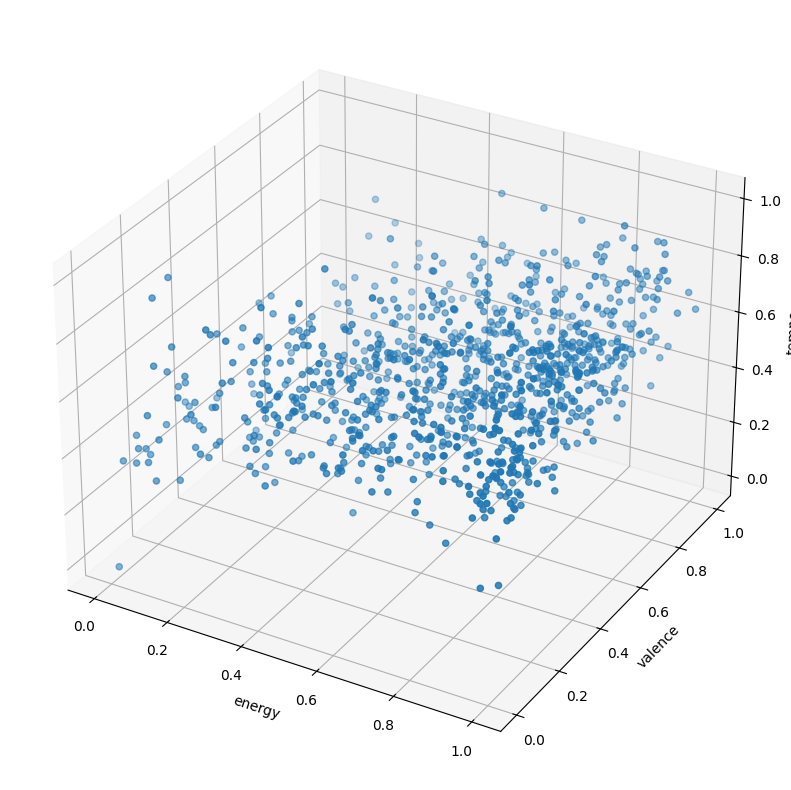

In [5]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection="3d")

ax.scatter(norm_subset['energy'], norm_subset['valence'], norm_subset['tempo'])

ax.set_xlabel('energy')
ax.set_ylabel('valence')
ax.set_zlabel('tempo')

plt.show()

## Generating random Entry from normalized data sample for testing purpose

In [6]:
X_train_norm['org_index'] = subset_with_id_and_name.index
start_value = X_train_norm.sample(1)
print(start_value)

        energy   valence     tempo  danceability  speechiness  org_index
4693  0.308571  0.109519  0.465343      0.405631     0.036354       4693


## KMeans Clustering

In [7]:
def get_cluster(data, labels, start_label):
    cluster_points = data[labels == start_label]
    return cluster_points

In [ ]:

from sklearn.cluster import KMeans
from tabulate import tabulate

# initiate kmeans
kmeans = KMeans(n_clusters = cluster_count, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

start_label = kmeans.predict(start_value)
labels = kmeans.labels_

# get cluster containing the start song
cluster_points = get_cluster(X_train_norm, labels, start_label)

original_indices = cluster_points['org_index']

print_table_kMeans = []
value_list_kMeans = []

# save song data in lists
# print_table_kMeans contains artist name and genre
# value_list_kMeans contains the actual values for each data column (energy, valence, ...)
for index in original_indices:
    print_table_kMeans.append([subset_with_id_and_name.loc[index].artists, subset_with_id_and_name.loc[index].track_name, subset_with_id_and_name.loc[index].track_genre])
    value_list_kMeans.append([X_train_norm.loc[index].energy, X_train_norm.loc[index].valence, X_train_norm.loc[index].tempo, X_train_norm.loc[index].danceability, X_train_norm.loc[index].speechiness])
    
# print kmeans output cluster
print(tabulate(print_table_kMeans, headers=['Artists','Trackname','Genre'])) 


Artists            Trackname                         Genre
-----------------  --------------------------------  -------
Hiroyuki Sawano    Attack on Titan                   anime
Sleeping At Last   Total Eclipse of the Heart        ambient
Keaton Henson      You Don't Know How Lucky You Are  ambient
Bicep              Lido                              ambient
Mercuzio Pianist   La noyée - Amelie soundtrack      ambient
Grouper            Living Room                       ambient
aswekeepsearching  In Circles                        ambient
SEKAI NO OWARI     silent                            anime
Air                Alone in Kyoto                    ambient
Little Symphony    Keyne                             ambient
Federico Albanese  By the Deep Sea                   ambient
Tom Day            Who We Want to Be                 ambient
Yann Tiersen       The Drowned Girl - Edit           ambient


In [14]:
print(original_indices)

5077    5077
4629    4629
4693    4693
4723    4723
4726    4726
4318    4318
4653    4653
5049    5049
4323    4323
4590    4590
4737    4737
4220    4220
4920    4920
Name: org_index, dtype: int64


# Nearest Neighbours

In [11]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

samples = X_train_norm

# inititate nearest neighbor
neigh = NearestNeighbors(n_neighbors=10)
neigh.fit(samples)

# cluster around starting song
neighbour_indizes = neigh.kneighbors(start_value.to_numpy(), 10, return_distance=False)
    
print(neighbour_indizes)

[[259 281 384 453 789 230 772 961 467 666]]


c:\Users\Scheske\Documents\Private\Studium Ohm\Semester 7\Bionic Computing\BionicComputing\sklearn-env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


## Extract Songs via indizes

In [12]:
print_table_kNearest = []
value_list_kNearest = []
org_indices_kNearest = []

# Get original indices
for index in neighbour_indizes:
    org_indices_kNearest.append(subset_with_id_and_name.iloc[index].index)

org_indices_kNearest = org_indices_kNearest[0]
print(org_indices_kNearest)

# save song data in lists
# print_table_kMeans contains artist name and genre
# value_list_kMeans contains the actual values for each data column (energy, valence, ...)
for index in org_indices_kNearest:
    print_table_kNearest.append([subset_with_id_and_name.loc[index].artists, subset_with_id_and_name.loc[index].track_name, subset_with_id_and_name.loc[index].track_genre])
    value_list_kNearest.append([X_train_norm.loc[index].energy, X_train_norm.loc[index].valence, X_train_norm.loc[index].tempo, X_train_norm.loc[index].danceability, X_train_norm.loc[index].speechiness])

Index([4693, 4723, 4726, 4653, 4737, 4629, 4590, 4920, 5049, 4323], dtype='int64')


## Calculating ndcg Score

In [13]:
import numpy as np
from sklearn.metrics import ndcg_score

print(start_value)

# ground truth = energy, valence, tempo, danceability, speechiness of starting song
start_value_array = [[start_value.iloc[0]['energy'], start_value.iloc[0]['valence'], start_value.iloc[0]['tempo'], start_value.iloc[0]['danceability'], start_value.iloc[0]['speechiness']]]

score_array_kMeans = []
# calculating ndcg score for KMeans list
for entry in value_list_kMeans:
    score_array_kMeans.append(ndcg_score(start_value_array, [entry]))

score_array_kNearest = []
# calculating ndcg score for KNearest list
for entry in value_list_kNearest:
    score_array_kNearest.append(ndcg_score(start_value_array, [entry]))
    
# Calc average of kMeans Scores
avg_kMeans = sum(score_array_kMeans) / len(score_array_kMeans)

# Calc average of kNearest Scores
avg_kNearest = sum(score_array_kNearest) / len(score_array_kNearest)

# print overall results with comparison of both algorithms
print("Starting Track")
print(tabulate(subset_with_id_and_name.loc[start_value.org_index]))

print("\n\nKNearest Neighbours")
print(tabulate(print_table_kNearest, headers=['Artists','Trackname','Genre']))  

print("\n\nKMeans Clustering")
print(tabulate(print_table_kMeans, headers=['Artists','Trackname','Genre']))

print("\n\nAverage scores of kMeans and kNearest")
print("kMeans:", round(avg_kMeans, 3))
print("kNearest:", round(avg_kNearest, 3))

        energy   valence     tempo  danceability  speechiness  org_index
4693  0.308571  0.109519  0.465343      0.405631     0.036354       4693
Starting Track
----  ----------------------  -------------  --------------------------------  -----  -----  ------  -----  ------  -------
4693  7L4w1yQnlhqo4oUjpW53wz  Keaton Henson  You Don't Know How Lucky You Are  0.389  0.314  0.0345  0.107  95.641  ambient
----  ----------------------  -------------  --------------------------------  -----  -----  ------  -----  ------  -------


KNearest Neighbours
Artists            Trackname                         Genre
-----------------  --------------------------------  -------
Keaton Henson      You Don't Know How Lucky You Are  ambient
Bicep              Lido                              ambient
Mercuzio Pianist   La noyée - Amelie soundtrack      ambient
aswekeepsearching  In Circles                        ambient
Federico Albanese  By the Deep Sea                   ambient
Sleeping At Last   T